<a href="https://colab.research.google.com/github/mohanpartha/ML_preprocessing/blob/master/White_Wine_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
col_names = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total sulfur_dioxide","density","pH","sulphates","alcohol","quality"]

In [0]:
df_white = pd.read_csv('/content/drive/My Drive/data/winequality-white.csv',sep=';')

In [0]:
from sklearn.model_selection import train_test_split

In [131]:
df_white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
Name: quality, dtype: int64

In [0]:
df_white = df_white[(df_white.quality!=3)&(df_white.quality!=9)]

In [132]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [134]:
df_white.shape

(4873, 12)

In [135]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
features = df_white.columns.difference(['quality'])

In [0]:
X = df_white[features]

In [139]:
X

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,8.8,0.045,0.36,1.00100,7.0,45.0,3.00,20.7,0.45,170.0,0.27
1,9.5,0.049,0.34,0.99400,6.3,14.0,3.30,1.6,0.49,132.0,0.30
2,10.1,0.050,0.40,0.99510,8.1,30.0,3.26,6.9,0.44,97.0,0.28
3,9.9,0.058,0.32,0.99560,7.2,47.0,3.19,8.5,0.40,186.0,0.23
4,9.9,0.058,0.32,0.99560,7.2,47.0,3.19,8.5,0.40,186.0,0.23
...,...,...,...,...,...,...,...,...,...,...,...
4893,11.2,0.039,0.29,0.99114,6.2,24.0,3.27,1.6,0.50,92.0,0.21
4894,9.6,0.047,0.36,0.99490,6.6,57.0,3.15,8.0,0.46,168.0,0.32
4895,9.4,0.041,0.19,0.99254,6.5,30.0,2.99,1.2,0.46,111.0,0.24
4896,12.8,0.022,0.30,0.98869,5.5,20.0,3.34,1.1,0.38,110.0,0.29


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scalar = StandardScaler()

In [140]:
y = df_white['quality']
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4873, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
X_train_scaled = scalar.fit_transform(X_train)

In [156]:
X_train_scaled

array([[ 0.14777818, -0.31545859, -1.09810909, ..., -0.97054435,
        -0.14470445,  0.22340819],
       [ 0.63064928,  0.67143295, -0.43916793, ...,  0.89950096,
        -0.14470445, -0.57120253],
       [-0.09365737, -0.03348958, -0.43916793, ...,  0.45425208,
         1.97276798, -0.67052887],
       ...,
       [-0.09365737, -0.12747925,  0.05503794, ...,  1.87904851,
        -0.21607992, -0.47187619],
       [-0.33509292,  0.8594123 , -0.52153557, ...,  0.00900319,
         0.04563015, -0.27322351],
       [-1.2203566 , -0.26846376,  0.7139791 , ...,  2.94764583,
         0.83076038,  0.02475551]])

In [143]:
X_train.shape

(3264, 11)

In [144]:
y_train.shape

(3264,)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=1)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
tree = RandomForestClassifier( min_samples_leaf=5)

In [179]:
tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree, X_train,y_train,cv=10,scoring='accuracy').mean()

0.6332704827301552

In [181]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
logreg.coef_

array([[-5.55923884e-01, -3.68423801e-02, -3.57635809e-01,
        -8.67797941e-02,  2.24346081e-01, -4.51135933e-02,
         5.51857898e-01, -6.04149906e-02,  1.49882639e-01,
        -1.48287699e-03,  4.01667344e+00],
       [-8.94106891e-01,  4.66969271e-01, -5.02498403e-02,
         2.49505431e+00,  1.74601125e-01, -7.62745506e-03,
         4.58708079e-01, -4.16982271e-02, -9.72474947e-01,
         4.02521891e-03,  3.92265398e+00],
       [ 1.35948849e-01,  1.42330842e-01,  5.20430352e-01,
        -1.12457426e-01, -7.63921816e-02,  1.61517295e-03,
        -5.39913826e-02,  2.36980175e-02, -8.55559274e-02,
        -6.90358975e-04, -3.51874818e+00],
       [ 6.80031486e-01, -1.20504369e+00, -8.71136127e-01,
        -2.94753595e+00, -1.15869063e-01,  5.39888994e-03,
        -4.99788733e-01,  2.03635982e-02,  9.18581409e-01,
        -1.77749771e-03, -2.84976789e+00],
       [ 6.01750936e-01, -1.30791634e-01, -6.27093350e-01,
        -1.42343153e+00, -2.74382096e-01,  3.02591171e-02,
  

In [0]:
from sklearn.metrics import plot_confusion_matrix

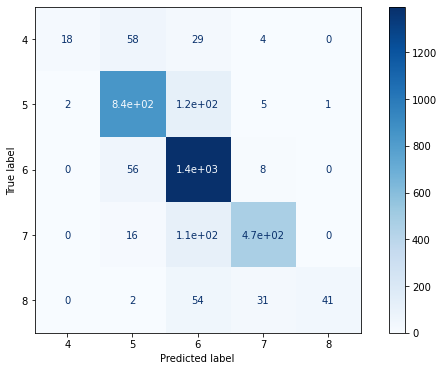

In [185]:
fig,ax=plt.subplots(1,1,figsize = [10,6])
plot_confusion_matrix(tree, X_train, y_train,
                                 display_labels=logreg.classes_,
                                 cmap=plt.cm.Blues,ax=ax)


In [110]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)